### Import Libraries

In [1]:
import pyforest
from termcolor import colored
import sweetviz as sv
# import os
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Import Data

In [2]:
magic=pd.read_csv(r'stats.csv')

<IPython.core.display.Javascript object>

### Clean Data and Verify Dataframe

In [3]:
magic[['Name', 'Player_ID']] = magic.Player.str.split('\\', expand=True)
magic[['FirstName', 'LastName']] = magic.Name.str.split(' ', expand=True)
magic = magic.drop(['Player', 'Name'], axis= 1)
magic.rename(columns = {'Unnamed: 6':'H/A', 'Unnamed: 8': 'W/L'}, inplace = True) 
magic.head()

,Rk,Age,Pos,Date,Tm,H/A,Opp,W/L,GmSc,GS,...,AST,STL,BLK,TOV,PF,PTS,BPM,Player_ID,FirstName,LastName
0,1,30-111,C,2021-02-12,ORL,@,SAC,W,39.5,1,...,4,2,0,1,1,42,24.7,vucevni01,Nikola,Vučević
1,2,30-104,C,2021-02-05,ORL,NaN,CHI,W,37.7,1,...,4,0,1,1,2,43,14.2,vucevni01,Nikola,Vučević
2,3,30-084,C,2021-01-16,ORL,@,BRK,L,33.1,1,...,7,5,0,4,4,34,18.5,vucevni01,Nikola,Vučević
3,4,30-118,C,2021-02-19,ORL,NaN,GSW,W,32.2,1,...,10,1,1,0,1,30,12.5,vucevni01,Nikola,Vučević
4,5,30-120,C,2021-02-21,ORL,NaN,DET,W,30.0,1,...,3,1,2,1,2,37,11.7,vucevni01,Nikola,Vučević


### Histogram of Player GameScore Distribution

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

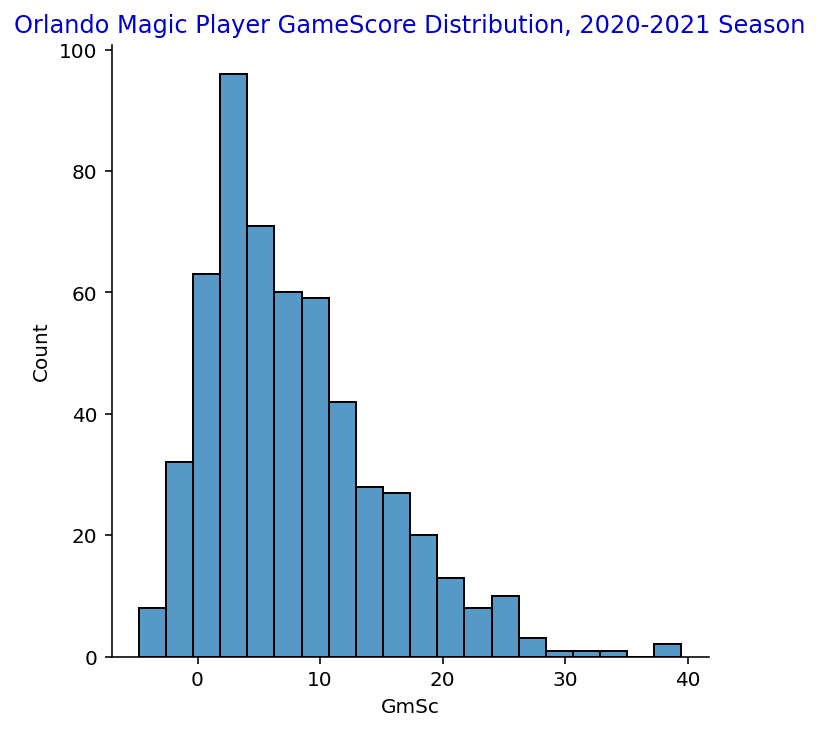

In [4]:
sns.displot(magic['GmSc'])
plt.title("Orlando Magic Player GameScore Distribution, 2020-2021 Season", color='mediumblue')
plt.show()


### Swarmplot of GameScore Distribution, by Player

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

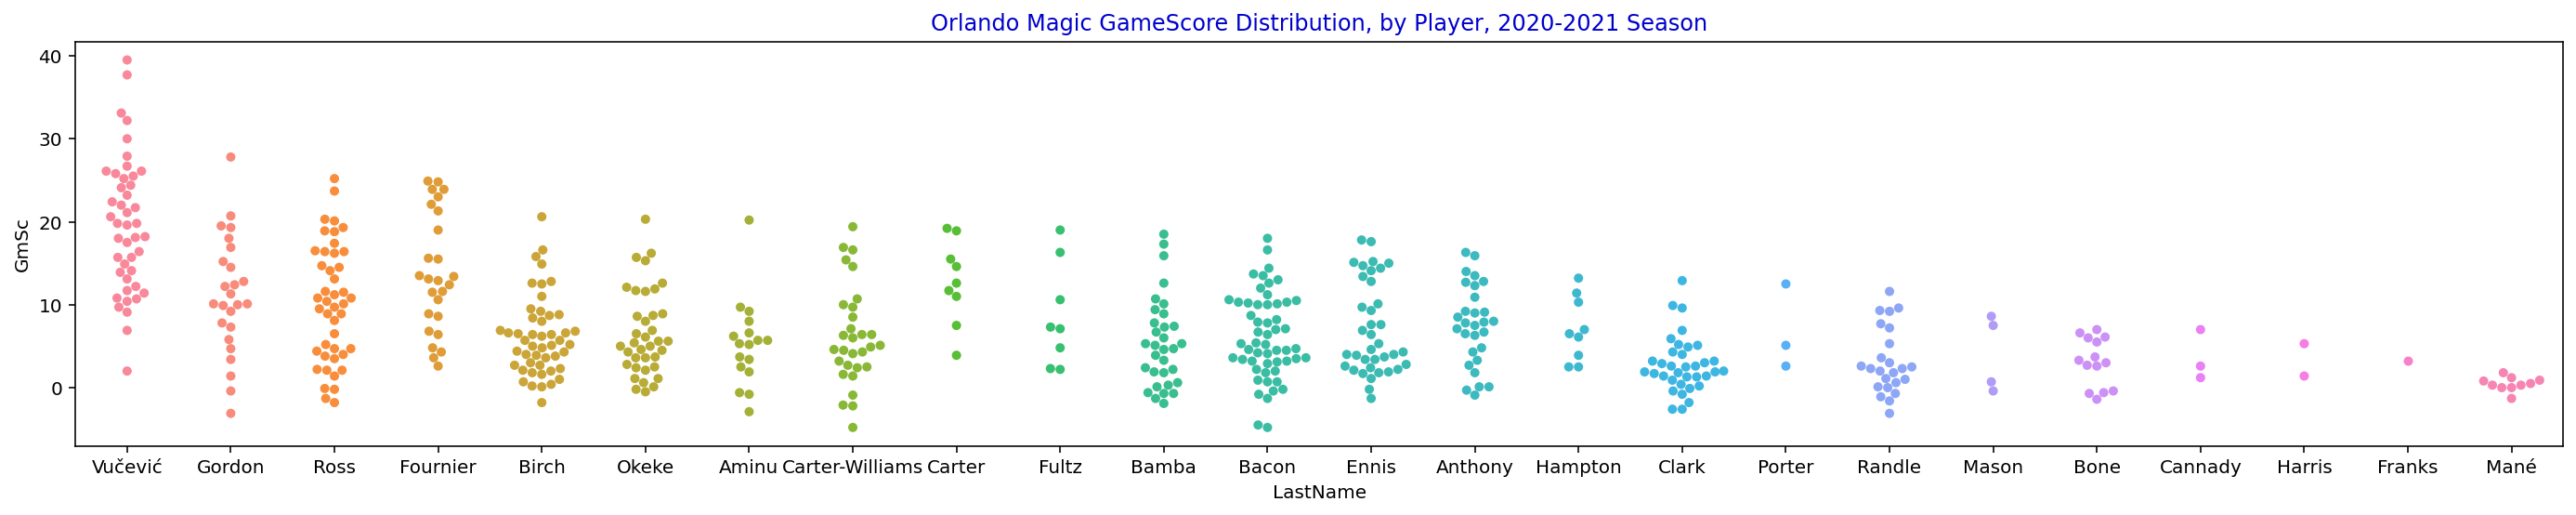

In [6]:
fig, ax = plt.subplots(figsize=(24,4))
sns.swarmplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Player, 2020-2021 Season", color='mediumblue')
plt.show()


### Boxplot of GameScore Distribution, by Player

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

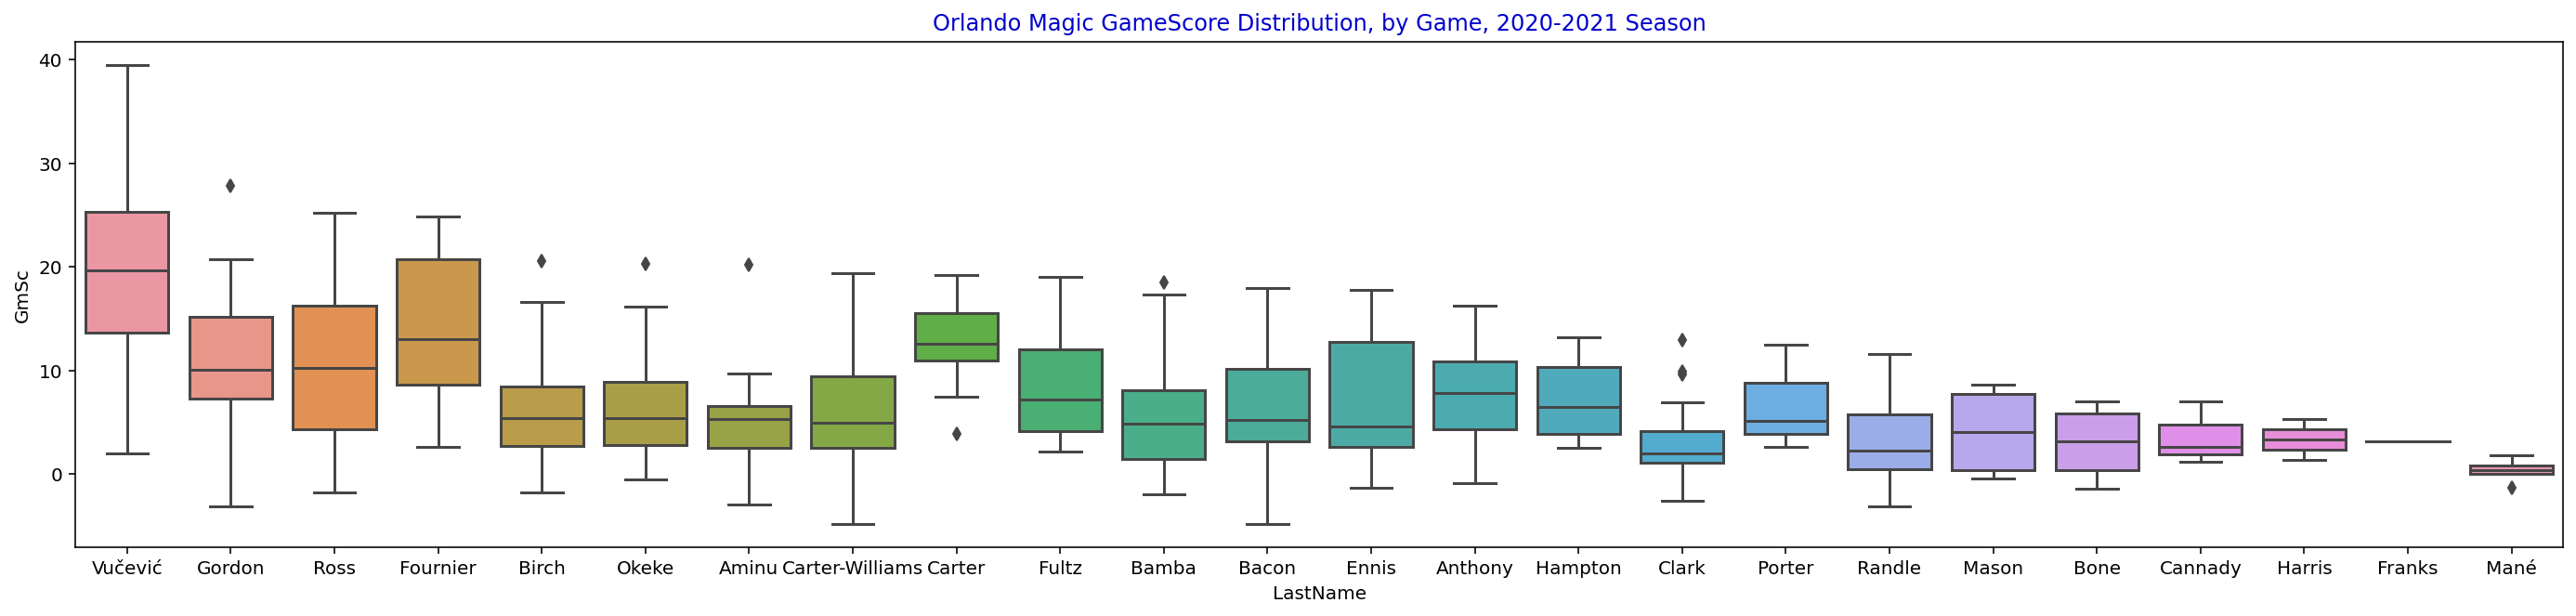

In [7]:
fig, ax = plt.subplots(figsize=(24,5))
sns.boxplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Game, 2020-2021 Season", color='mediumblue')
plt.show()

### Scatterplot of GameScore versus Minutes Played, by Player

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GameScore versus Minutes Played, by Player


<IPython.core.display.Javascript object>

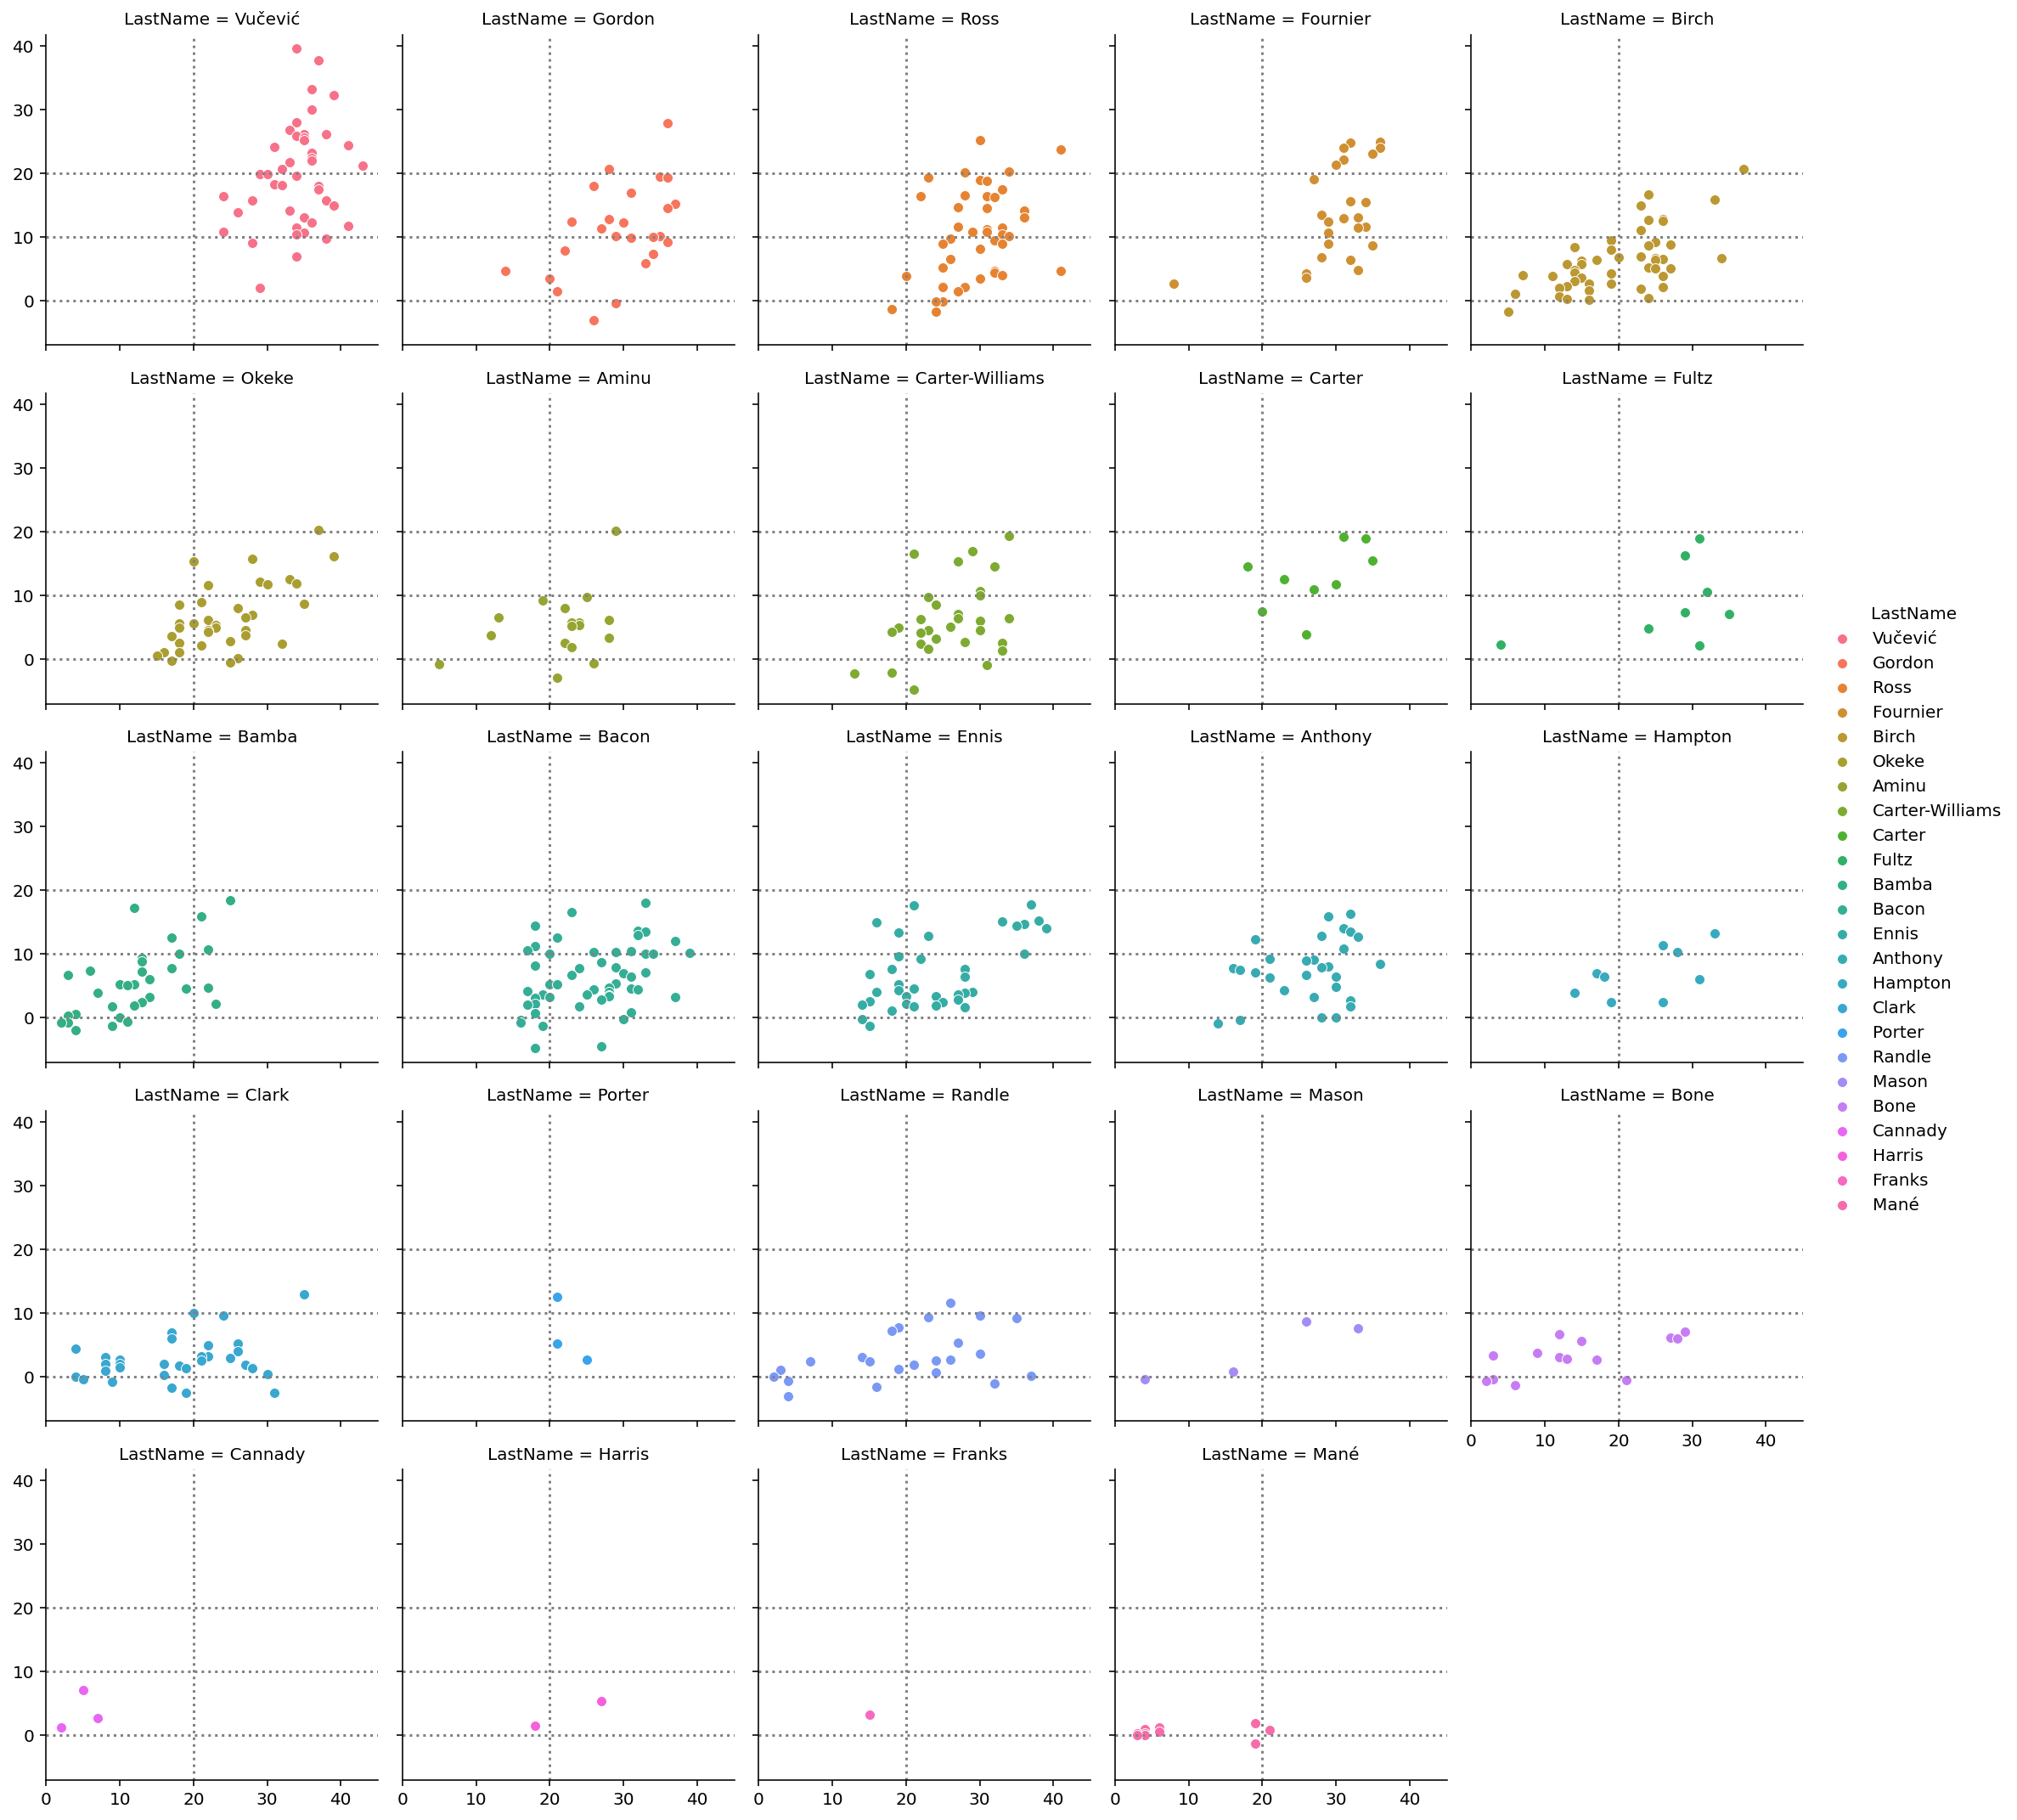

In [8]:
grid = sns.FacetGrid(magic, col = 'LastName', hue = 'LastName', col_wrap=5)
grid.map(sns.scatterplot, 'MP', 'GmSc')
grid.map(plt.axhline, y=10, ls=":", c=".5")
grid.map(plt.axhline, y=20, ls=":", c=".5")
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.axvline, x=20, ls=":", c=".5")
grid.add_legend()
print ("\033[1m"+(colored("GameScore versus Minutes Played, by Player", 'blue'))+"\033[0m")
plt.show() 
# Minutes played on x-axis, GameScore on y-axis

### FacetGrid of GameScore versus Date Game Played, Ranked by Highest GameScore

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GameScore versus Date Game Played, by GmSc Rank


<IPython.core.display.Javascript object>

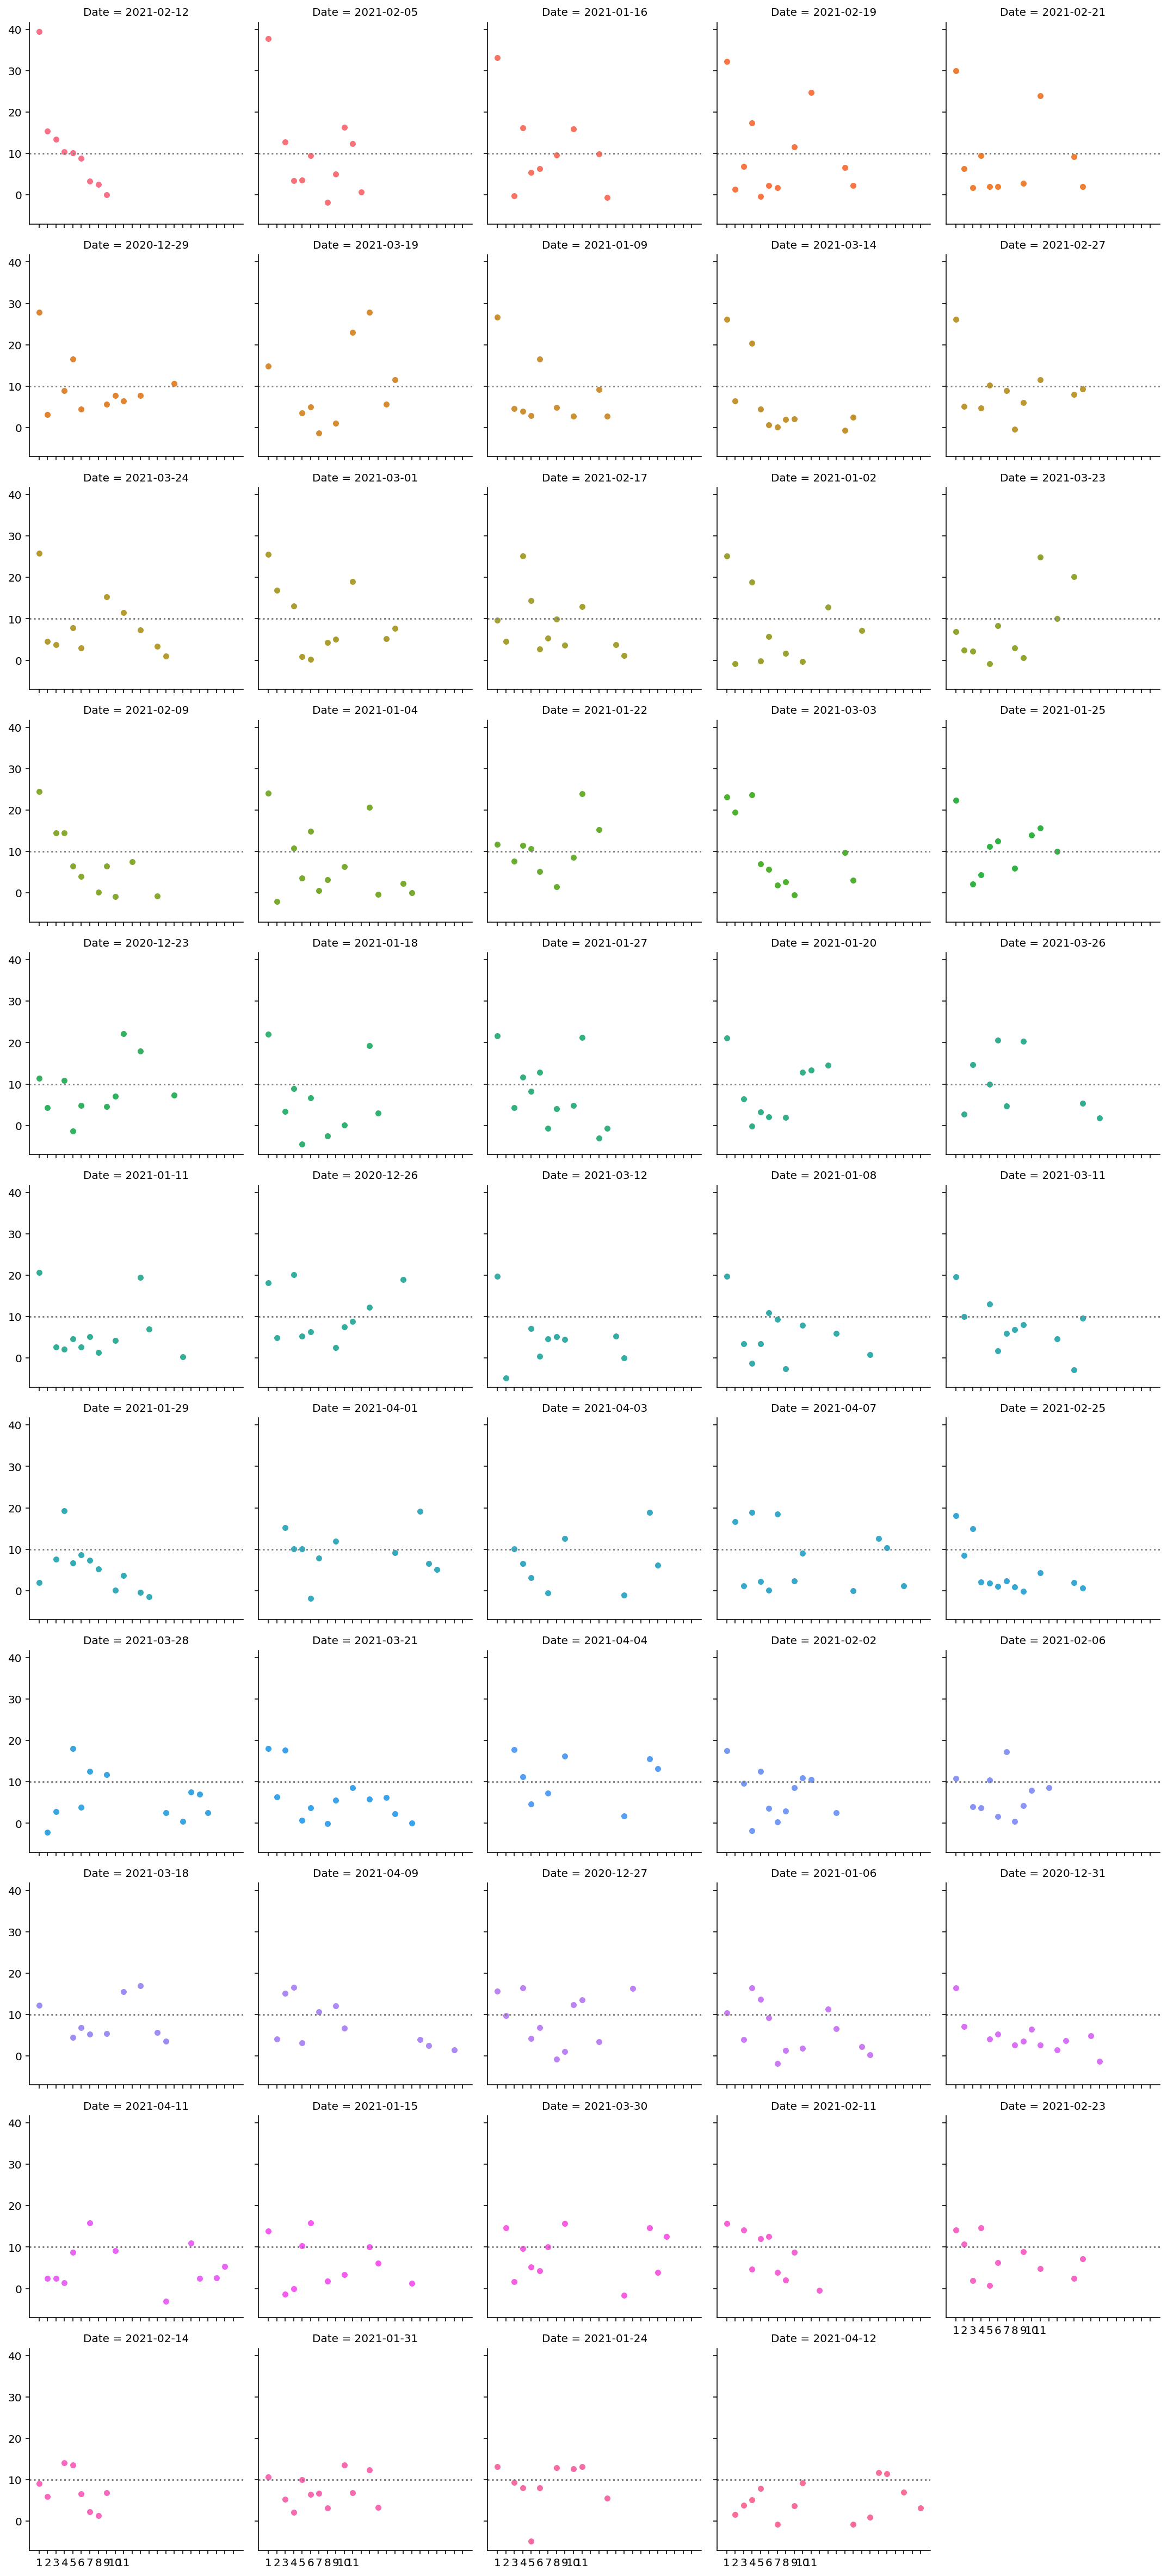

In [9]:
grid = sns.FacetGrid(magic, col = 'Date', hue = 'Date', col_wrap=5)
grid.map(sns.scatterplot, 'LastName', 'GmSc')
grid.set(xlabel="Player", ylabel="GameScore")
grid.set(xticklabels=[1,2,3,4,5,6,7,8,9,10,11])
grid.map(plt.axhline, y=10, ls=":", c=".5")
print ("\033[1m"+(colored("GameScore versus Date Game Played, by GmSc Rank", 'blue'))+"\033[0m")
plt.show() 
# x-axis shows highest GmSc on left, lowest on right for each game. Games ordered by highest game score (in the #1 position on x-axis)
# GmSc of >= 10 are considered above average performace. Points above the dashed line are 'above average'performances.

### Descriptive Statistics for GameScore, by Player

In [10]:
print ("\033[1m"+(colored("Descriptive Statistics for GameScore, by Player", 'blue'))+"\033[0m")
magic[['LastName','GmSc']].\
groupby(['LastName'], as_index=True).describe()

Descriptive Statistics for GameScore, by Player


GmSc                                                       
                count       mean       std  min     25%    50%     75%   max
LastName                                                                    
Aminu            17.0   5.235294  5.192897 -2.9   2.500   5.30   6.600  20.2
Anthony          29.0   7.513793  4.855168 -0.9   4.300   7.80  10.900  16.3
Bacon            54.0   6.150000  5.092234 -4.8   3.125   5.25  10.175  18.0
Bamba            32.0   5.465625  5.409407 -1.9   1.500   4.90   8.075  18.5
Birch            48.0   6.168750  4.752520 -1.8   2.700   5.45   8.475  20.6
Bone             14.0   3.100000  2.936246 -1.4   0.350   3.15   5.875   7.0
Cannady           3.0   3.600000  3.026549  1.2   1.900   2.60   4.800   7.0
Carter            9.0  12.766667  5.005996  3.9  11.000  12.60  15.500  19.2
Carter-Williams  30.0   6.176667  5.948207 -4.8   2.550   5.00   9.400  19.4
Clark            35.0   2.760000  3.364276 -2.6   1.100   2.00   4.150  12.9
Ennis            37.0   7.064865  5.553488 -1.3   2.600   4.60  12.800  17.8
Fournier         26.0  13.807692  7.129091  2.6   8.675  13.00  20.725  24.9
Franks            1.0   3.200000       NaN  3.2   3.200   3.20   3.200   3.2
Fultz             8.0   8.700000  6.215189  2.2   4.175   7.20  12.025  19.0
Gordon           25.0  11.072000  7.112754 -3.1   7.300  10.10  15.200  27.8
Hampton           9.0   7.044444  3.870436  2.5   3.900   6.50  10.300  13.2
Harris            2.0   3.350000  2.757716  1.4   2.375   3.35   4.325   5.3
Mané             10.0   0.450000  0.831665 -1.3   0.075   0.40   0.875   1.8
Mason             4.0   4.100000  4.605070 -0.4   0.425   4.10   7.775   8.6
Okeke            37.0   6.594595  5.144897 -0.5   2.800   5.40   8.900  20.3
Porter            3.0   6.733333  5.148139  2.6   3.850   5.10   8.800  12.5
Randle           24.0   3.179167  3.976778 -3.1   0.475   2.30   5.775  11.6
Ross             44.0  10.188636  7.055798 -1.8   4.300  10.25  16.250  25.2
Vučević          44.0  19.659091  8.130572  2.0  13.700  19.70  25.275  39.5

### Player Ranked by GameScore

In [12]:
print ("\033[1m"+(colored("Total Season GameScore, by Player", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName','MP']].groupby(['LastName']).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Total Season GameScore, by Player
                  GmSc    MP
LastName                    
Vučević          865.0  1500
Ross             448.3  1292
Fournier         359.0   786
Bacon            332.1  1377
Birch            296.1   954
Gordon           276.8   737
Ennis            261.4   887
Okeke            244.0   896
Anthony          217.9   764
Carter-Williams  185.3   774
Bamba            174.9   392
Carter           114.9   244
Clark             96.6   637
Aminu             89.0   367
Randle            76.3   477
Fultz             69.6   215
Hampton           63.4   212
Bone              43.4   197
Porter            20.2    67
Mason             16.4    79
Cannady           10.8    14
Harris             6.7    45
Mané               4.5    89
Franks             3.2    15


### Player Ranked by Minutes Played

In [13]:
print ("\033[1m"+(colored("Total Minutes Played, by Player", 'blue'))+"\033[0m")
game_score = magic[['MP','LastName','GmSc']].groupby(['LastName']).sum()
sort_game_score = game_score.sort_values(by=['MP'], ascending=False)
print(sort_game_score)

Total Minutes Played, by Player
                   MP   GmSc
LastName                    
Vučević          1500  865.0
Bacon            1377  332.1
Ross             1292  448.3
Birch             954  296.1
Okeke             896  244.0
Ennis             887  261.4
Fournier          786  359.0
Carter-Williams   774  185.3
Anthony           764  217.9
Gordon            737  276.8
Clark             637   96.6
Randle            477   76.3
Bamba             392  174.9
Aminu             367   89.0
Carter            244  114.9
Fultz             215   69.6
Hampton           212   63.4
Bone              197   43.4
Mané               89    4.5
Mason              79   16.4
Porter             67   20.2
Harris             45    6.7
Franks             15    3.2
Cannady            14   10.8


### Game Ranked by Aggregate GameScore

In [14]:
print ("\033[1m"+(colored("Aggregate Team GameScore, by Game", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName','Date']].groupby(['Date']).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Aggregate Team GameScore, by Game
             GmSc
Date             
2021-02-19  106.9
2020-12-26  105.0
2021-02-12  103.6
2021-02-05   99.7
2020-12-29   99.2
2020-12-27   98.6
2021-01-25   98.1
2021-03-01   97.8
2021-01-16   95.7
2021-03-03   95.7
2021-01-22   95.5
2021-04-01   93.3
2021-02-17   93.0
2021-04-07   92.9
2021-03-19   91.3
2021-03-30   90.7
2021-02-27   89.7
2021-02-21   89.6
2020-12-23   89.1
2021-04-04   87.6
2021-01-27   84.2
2021-01-04   83.9
2021-03-24   83.4
2021-01-31   80.5
2021-03-26   80.1
2021-03-23   78.0
2021-01-24   77.9
2021-02-02   77.5
2021-03-11   76.7
2021-02-09   76.2
2021-04-09   76.1
2021-03-18   76.0
2021-01-06   75.4
2021-01-20   75.2
2021-03-21   74.8
2021-01-09   74.3
2021-02-11   73.3
2021-02-23   71.7
2021-01-11   70.3
2021-01-02   69.9
2021-02-06   69.3
2021-03-28   67.0
2021-04-12   64.3
2021-03-14   64.0
2021-01-15   61.1
2021-02-14   59.8
2021-01-29   58.8
2021-04-11   58.2
2021-01-08   57.8
2020-12-31   56.7
2021-02-25   56.4
2021-01-18  

### Descriptive Statistics

In [15]:
magic.describe()

,Rk,GmSc,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
count,545.00000,545.000000,545.000000,545.000000,545.000000,545.000000,527.000000,545.000000,545.000000,499.000000,...,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,273.00000,7.845505,0.495413,23.884404,3.818349,8.880734,0.412211,2.700917,5.655046,0.472812,...,1.038532,3.502752,4.541284,2.207339,0.688073,0.418349,1.234862,1.677064,10.315596,-2.501468
std,157.47222,7.123985,0.500438,8.925109,3.197833,6.092312,0.211875,2.467528,4.444748,0.273348,...,1.318833,2.823303,3.434075,2.100232,0.910491,0.715655,1.321442,1.347085,8.195421,9.888191
min,1.00000,-4.800000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.100000
25%,137.00000,2.500000,0.000000,18.000000,1.000000,4.000000,0.286000,1.000000,2.000000,0.324500,...,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,-8.000000
50%,273.00000,6.400000,0.000000,25.000000,3.000000,8.000000,0.400000,2.000000,4.000000,0.500000,...,1.000000,3.000000,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000,8.000000,-3.100000
75%,409.00000,11.700000,1.000000,31.000000,6.000000,13.000000,0.529000,4.000000,8.000000,0.636000,...,2.000000,5.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,15.000000,2.700000
max,545.00000,39.500000,1.000000,43.000000,17.000000,29.000000,1.000000,13.000000,21.000000,1.000000,...,10.000000,16.000000,19.000000,10.000000,5.000000,4.000000,7.000000,6.000000,43.000000,60.300000


### Create Standalone Sweetviz Report

In [16]:
my_report = sv.analyze(magic)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
